# SPNC - Control of magnetization through anistropy

## The Stoner-Wolfarth model - control of $\theta_H$

We consider a superparamagnetic material in a field $H$, forming an angle $\theta_H$ with the magnet's easy axis. The energy of our system reads:

$$E(\theta,\theta_H) = KV\sin^2{\theta} -\mu_0M_SVH\cos{(\theta-\theta_H)}$$

where $K$ is the constant of anisotropy along the easy axis, $M_S$ is the satured magnetization, $V$ the volume of the magnet and $\theta$ the angle between the easy axis and the magnetization $m$. Here we are interested in the behaviour of the extrema of $E(\theta)$ when we change $\theta_H$. Knowing the extrema of $E(\theta)$, we will be able to calculate the energy barriers of this two-state system. Using Arhhenius equation, we will plot the evolution of the system's magnetization at equilibrium, according to $\theta_H$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit

Let's fix the constant parameters and define the energy function.

In [2]:
K = 1
V = 1
mu_0 = 1
M_S = 2
H = 0.4
H_K = 2*K/(mu_0*M_S)

In [3]:
def energy(theta,theta_H):
    mu_H = mu_0*M_S*H
    return(K*V*np.sin(theta*np.pi/180)**2-mu_H*np.cos((theta-theta_H)*np.pi/180))

When $\theta_H = 30°$, the energy landscape looks like this:

In [4]:
theta = np.linspace(0,180,100)
theta_H = 30
E = energy(theta,theta_H)

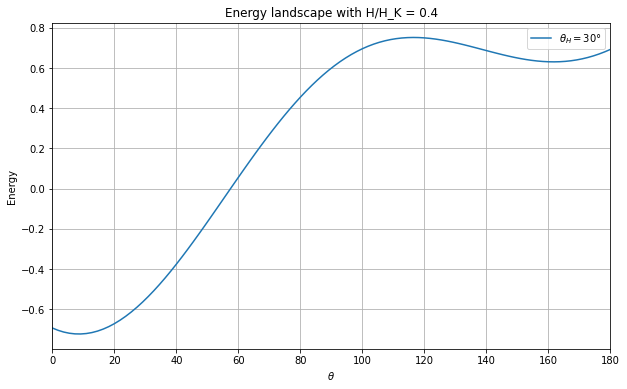

In [5]:
plt.figure(figsize = (10,6))
plt.plot(theta, E, label = r'$\theta_H = 30°$')
plt.grid(True)
plt.xlim(0,180)
plt.legend(loc="best")
plt.xlabel(r'$\theta$')
plt.ylabel(r'Energy')
plt.title("Energy landscape with H/H_K = "+str(H/H_K))
plt.show()

### Energy barriers

We can know evaluate the energy barriers of this landscape, according to the value of $\theta_H$. We both save the value of $\theta$ and the value $E(\theta)$ on the extrema.

In [6]:
def energy_barriers(theta_H):
    theta = np.linspace(-1,181,100)
    E = energy(theta,theta_H)
    
    #Localization of extrema
    id_max = argrelextrema(E, np.greater)[0]
    id_min = argrelextrema(E, np.less)[0]
    
    #Two-state case
    if(len(id_max)==1 and len(id_min==2)):
        theta_1 = theta[id_min[0]]
        theta_2 = theta[id_min[1]]
        e_12 = E[id_max[0]]-E[id_min[0]]
        e_21 = E[id_max[0]]-E[id_min[1]]
        
    #The function argrelextrema fails for discrete values of theta_H, therefore we slightly change theta_H
    else:
        E = energy(theta,theta_H-0.01)
        id_max = argrelextrema(E, np.greater)[0]
        id_min = argrelextrema(E, np.less)[0]
        theta_1 = theta[id_min[0]]
        theta_2 = theta[id_min[1]]
        e_12 = E[id_max[0]]-E[id_min[0]]
        e_21 = E[id_max[0]]-E[id_min[1]]
    
    return(theta_1,theta_2,e_12,e_21)

In [7]:
Theta_H = np.linspace(0,180,50)
E_12 = []
E_21 = []
Theta_1 = []
Theta_2 = []
for theta_H in Theta_H:
    (theta_1,theta_2,e_12,e_21) = energy_barriers(theta_H)
    Theta_1.append(theta_1)
    Theta_2.append(theta_2)
    E_12.append(e_12)
    E_21.append(e_21)

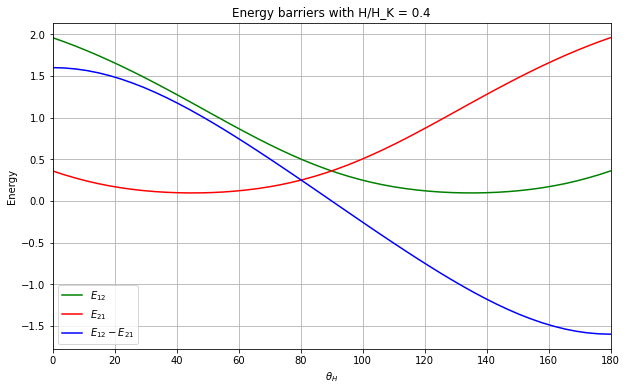

In [8]:
plt.figure(figsize = (10,6))
plt.plot(Theta_H,E_12,'g-',label=r'$E_{12}$')
plt.plot(Theta_H,E_21,'r-',label=r'$E_{21}$')
plt.plot(Theta_H,np.array(E_12)-np.array(E_21),'b-',label=r'$E_{12}-E_{21}$')
plt.legend(loc = "best")
plt.xlim(0,180)
plt.grid(True)
plt.xlabel(r'$\theta_H$')
plt.ylabel(r'Energy')
plt.title("Energy barriers with H/H_K = "+str(H/H_K))
plt.show()

$E_{12}-E_{21}$ changes with $\theta_H$, which is what we are looking for!

*We may note that $E_{12}-E_{21}$ is almost linear in $\theta_H$ on a wide range around $\theta_H=90°$*

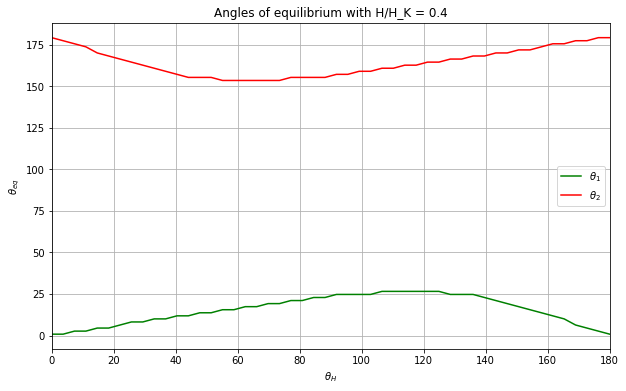

In [9]:
plt.figure(figsize = (10,6))
plt.plot(Theta_H,Theta_1,'g-',label=r'$\theta_1$')
plt.plot(Theta_H,Theta_2,'r-',label=r'$\theta_2$')
plt.legend(loc = "best")
plt.xlim(0,180)
plt.grid(True)
plt.xlabel(r'$\theta_H$')
plt.ylabel(r'$\theta_{eq}$')
plt.title("Angles of equilibrium with H/H_K = "+str(H/H_K))
plt.show()

### Arrhenius equation

According to Arrhenius equation, the transition rate from one state to the other reads:

$$\omega = \frac{1}{\tau} = f_0\exp{(-E_b/K_BT)}$$

where $E_b$ is the energy barrier, $k_B$ the Boltzmann constant and $T$ the temperature. We will fix $f_0=1$.

In [10]:
def omega(e_b,k_BT):
    return(np.exp(-e_b/k_BT))

### Magnetization at equilibrium

In this two-state system, the probability of being in state $i$ follows the equation:

$$p_i(t) =  \frac{\omega_{ji}}{\omega} + \left[p_i(0) - \frac{\omega_{ji}}{\omega} \right] \exp{(-\omega t)}$$

where $\omega = \omega_{21}+\omega_{12}$. Here, the states 1 and 2 are not necessarily aligned with the easy axis. Therefore, the projection of the magnetization along the easy axis (normalized) is:

$$m(t) = \cos{\theta_1}p_1(t) + \cos{\theta_2}p_2(t)$$

Which gives the following expression for $m(t)$:

$$m(t) = m_{eq} + \left[m(0) - m_{eq} \right]\exp{(-\omega t)}$$

where $m_{eq}$ is is the magnetization at equilibrium (projected on the east axis) and reads:

$$m_{eq} = \frac{\cos{\theta_1}\omega_{21} + \cos{\theta_2}\omega_{12}}{\omega}$$

In [11]:
def mag_eq(theta_1,theta_2,e_12,e_21,k_BT):
    w_12 = omega(e_12,k_BT)
    w_21 = omega(e_21,k_BT)
    return((np.cos(theta_1*np.pi/180)*w_21+np.cos(theta_2*np.pi/180)*w_12)/(w_21+w_12))

In [12]:
Temperatures = [0.1, 0.3, 1, 3, 10]

In [13]:
Mag_eq_T = []
for k_BT in Temperatures:
    Mag_eq = []
    for i in range(len(Theta_1)):
        Mag_eq.append(mag_eq(Theta_1[i],Theta_2[i],E_12[i],E_21[i],k_BT))
    Mag_eq_T.append(Mag_eq)

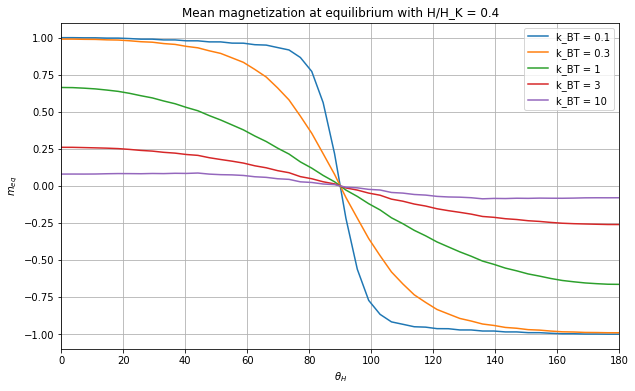

In [14]:
plt.figure(figsize = (10,6))
for i in range(len(Temperatures)):
    plt.plot(Theta_H,Mag_eq_T[i],label="k_BT = "+str(Temperatures[i]))
plt.xlim(0,180)
plt.legend(loc="best")
plt.grid(True)
plt.xlabel(r'$\theta_H$')
plt.ylabel(r'$m_{eq}$')
plt.title("Mean magnetization at equilibrium with H/H_K = "+str(H/H_K))
plt.show()

Since those curves look like hyperbolic tangent, let's try to interpolate those curves with the $\tanh$ function!

$$m_{eq}=-M\tanh{(\alpha \theta_H)}$$

In [15]:
def interpolate_tanh(x,alpha,M):
    return(-M*np.tanh(alpha*(x-90)*np.pi/180))

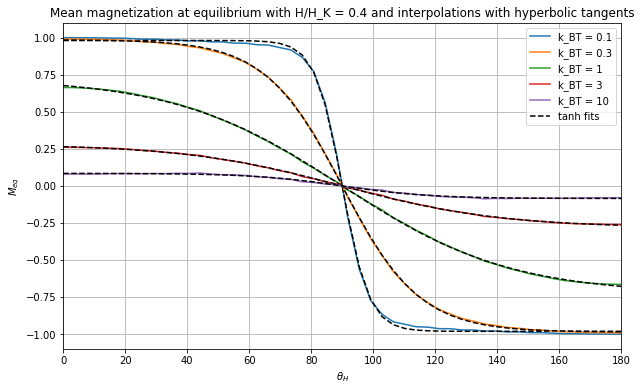

In [16]:
plt.figure(figsize = (10,6))
for i in range(len(Temperatures)):
    plt.plot(Theta_H,Mag_eq_T[i],label="k_BT = "+str(Temperatures[i]))
    popt, pcov = curve_fit(interpolate_tanh, Theta_H, Mag_eq_T[i])
    alpha = popt[0]
    M = popt[1]
    if (i==len(Temperatures)-1):
        plt.plot(Theta_H, interpolate_tanh(Theta_H,alpha,M),'k--',label="tanh fits")
    else:
        plt.plot(Theta_H, interpolate_tanh(Theta_H,alpha,M),'k--')
plt.xlim(0,180)
plt.legend(loc="best")
plt.grid(True)
plt.xlabel(r'$\theta_H$')
plt.ylabel(r'$M_{eq}$')
plt.title("Mean magnetization at equilibrium with H/H_K = "+str(H/H_K)+" and interpolations with hyperbolic tangents")
plt.show()

We can try to evaluate $\alpha$ and $M$ as functions of $k_BT$ in $m_{eq}=-M\tanh{(\alpha \theta_H)}$.

In [17]:
Temperatures_large = np.logspace(-2,1,30)
Mag_eq_T = []
for k_BT in Temperatures_large:
    Mag_eq = []
    for i in range(len(Theta_1)):
        Mag_eq.append(mag_eq(Theta_1[i],Theta_2[i],E_12[i],E_21[i],k_BT))
    Mag_eq_T.append(Mag_eq)

In [18]:
Alpha_vs_T = []
M_vs_T = []
for i in range(len(Temperatures_large)):
    popt, pcov = curve_fit(interpolate_tanh, Theta_H, Mag_eq_T[i])
    Alpha_vs_T.append(popt[0])
    M_vs_T.append(popt[1])

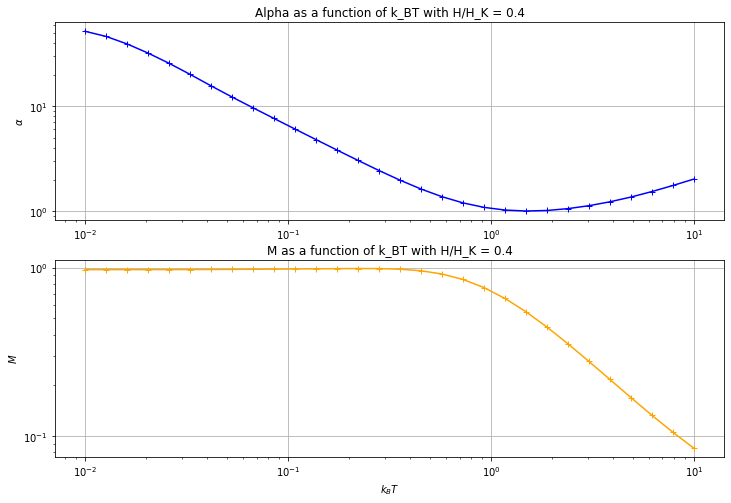

In [19]:
plt.figure(figsize = (12,8))
plt.subplot(211)
plt.plot(Temperatures_large, Alpha_vs_T, color = "blue", marker = '+')
plt.grid(True)
plt.ylabel(r'$\alpha$')
plt.title("Alpha as a function of k_BT with H/H_K = "+str(H/H_K))
plt.xscale("log")
plt.yscale("log")
plt.subplot(212)
plt.plot(Temperatures_large, M_vs_T, color = "orange", marker='+')
plt.grid(True)
plt.xlabel(r'$k_BT$')
plt.ylabel(r'$M$')
plt.xscale("log")
plt.yscale("log")
plt.title("M as a function of k_BT with H/H_K = "+str(H/H_K))
plt.show()

We can distinguish two regimes for $\alpha$ and $M$, depending on $k_BT$. We can try to get an intuition of the threshold $k_BT_{lim}$ above which the behaviours of $\alpha$ and $M$ change.

In [20]:
H_list = [0.01,0.03,0.1,0.3]

Alpha_vs_H = []
M_vs_H = []

for h in H_list:
    H = h

    Theta_H = np.linspace(0,180,50)
    E_12 = []
    E_21 = []
    Theta_1 = []
    Theta_2 = []
    for theta_H in Theta_H:
        (theta_1,theta_2,e_12,e_21) = energy_barriers(theta_H)
        Theta_1.append(theta_1)
        Theta_2.append(theta_2)
        E_12.append(e_12)
        E_21.append(e_21)

    Temperatures_large = np.logspace(-2,1,30)
    Mag_eq_T = []
    for k_BT in Temperatures_large:
        Mag_eq = []
        for i in range(len(Theta_1)):
            Mag_eq.append(mag_eq(Theta_1[i],Theta_2[i],E_12[i],E_21[i],k_BT))
        Mag_eq_T.append(Mag_eq)

    Alpha_vs_T = []
    M_vs_T = []
    for i in range(len(Temperatures_large)):
        popt, pcov = curve_fit(interpolate_tanh, Theta_H, Mag_eq_T[i])
        Alpha_vs_T.append(popt[0])
        M_vs_T.append(popt[1])
    
    Alpha_vs_H.append(Alpha_vs_T)
    M_vs_H.append(M_vs_T)
        
H = 0.4

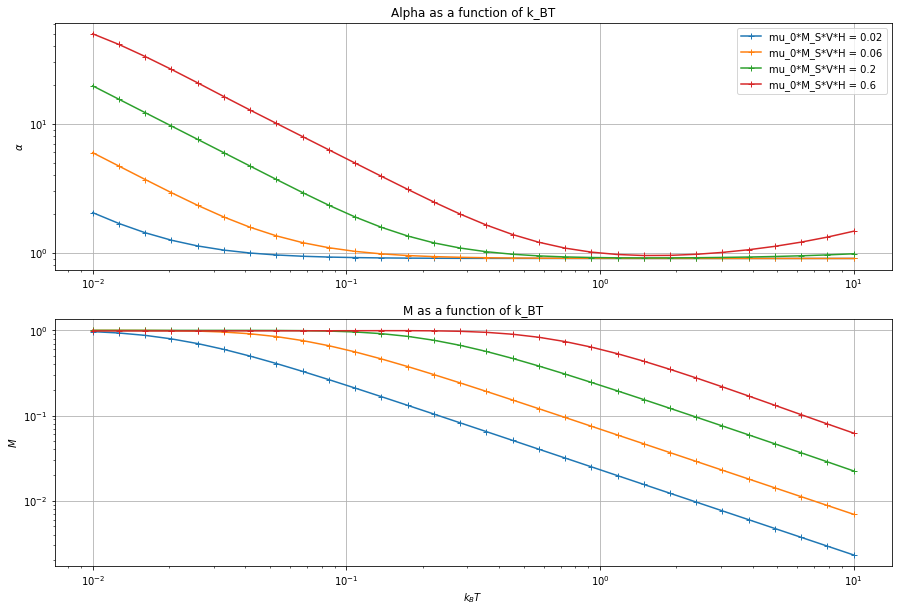

In [21]:
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(len(H_list)):
    plt.plot(Temperatures_large, Alpha_vs_H[i], marker = '+', label = "mu_0*M_S*V*H = "+str(H_list[i]*mu_0*M_S*V))
plt.grid(True)
plt.legend(loc="best")
plt.ylabel(r'$\alpha$')
plt.title("Alpha as a function of k_BT")
plt.xscale("log")
plt.yscale("log")
plt.subplot(212)
for i in range(len(H_list)):
    plt.plot(Temperatures_large, M_vs_H[i], marker = '+', label = "mu_0*M_S*V*H = "+str(H_list[i]*mu_0*M_S*V))
plt.grid(True)
plt.xlabel(r'$k_BT$')
plt.ylabel(r'$M$')
plt.xscale("log")
plt.yscale("log")
plt.title("M as a function of k_BT")
plt.show()

The threshold $k_BT_{lim}$ seems to depend on the characteristic energy $\mu_0M_SVH$.

In [22]:
K_list = [1,2,5]

Alpha_vs_K = []
M_vs_K = []

for k in K_list:
    K = k

    Theta_H = np.linspace(0,180,50)
    E_12 = []
    E_21 = []
    Theta_1 = []
    Theta_2 = []
    for theta_H in Theta_H:
        (theta_1,theta_2,e_12,e_21) = energy_barriers(theta_H)
        Theta_1.append(theta_1)
        Theta_2.append(theta_2)
        E_12.append(e_12)
        E_21.append(e_21)

    Temperatures_large = np.logspace(-2,1,30)
    Mag_eq_T = []
    for k_BT in Temperatures_large:
        Mag_eq = []
        for i in range(len(Theta_1)):
            Mag_eq.append(mag_eq(Theta_1[i],Theta_2[i],E_12[i],E_21[i],k_BT))
        Mag_eq_T.append(Mag_eq)

    Alpha_vs_T = []
    M_vs_T = []
    for i in range(len(Temperatures_large)):
        popt, pcov = curve_fit(interpolate_tanh, Theta_H, Mag_eq_T[i])
        Alpha_vs_T.append(popt[0])
        M_vs_T.append(popt[1])
    
    Alpha_vs_K.append(Alpha_vs_T)
    M_vs_K.append(M_vs_T)
        
K = 1

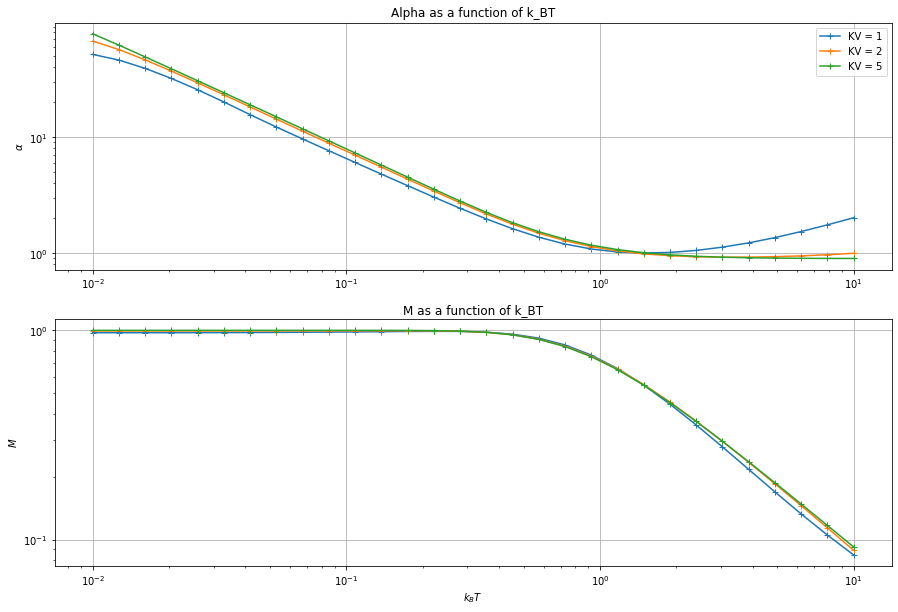

In [23]:
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(len(K_list)):
    plt.plot(Temperatures_large, Alpha_vs_K[i], marker = '+', label = "KV = "+str(K_list[i]*V))
plt.grid(True)
plt.legend(loc="best")
plt.ylabel(r'$\alpha$')
plt.title("Alpha as a function of k_BT")
plt.xscale("log")
plt.yscale("log")
plt.subplot(212)
for i in range(len(K_list)):
    plt.plot(Temperatures_large, M_vs_K[i], marker = '+', label = "KV = "+str(K_list[i]*V))
plt.grid(True)
plt.xlabel(r'$k_BT$')
plt.ylabel(r'$M$')
plt.xscale("log")
plt.yscale("log")
plt.title("M as a function of k_BT")
plt.show()

Surprinsingly, the threshold $k_BT_{lim}$ does not depend on the characteristic energy $KV$.

Therefore, under the condition $k_BT\ll\mu_0M_SVH$, we have the following expressions for $M$ and $\alpha$:

$$M = 1$$

$$\alpha = c\frac{\mu_0M_SVH}{k_BT}$$

Where $c$ is a constant we now want to determine.

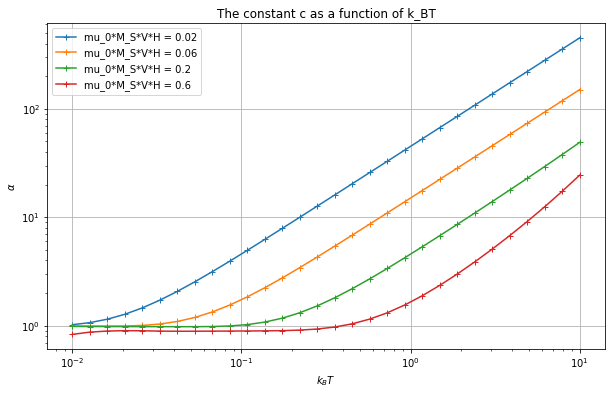

In [24]:
plt.figure(figsize = (10,6))
for i in range(len(H_list)):
    plt.plot(Temperatures_large, Alpha_vs_H[i]*Temperatures_large/(mu_0*M_S*V*H_list[i]), marker = '+', label = "mu_0*M_S*V*H = "+str(H_list[i]*mu_0*M_S*V))
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$k_BT$')
plt.ylabel(r'$\alpha$')
plt.title("The constant c as a function of k_BT")
plt.xscale("log")
plt.yscale("log")
plt.show()

For $k_BT\ll\mu_0M_SVH$, the previous curves converge towards $c=1$.

#### Conclusion

In this simplistic system, we only looked at the influence $\theta_H$ on the energy barriers and on the magnetization at equilibrium (normalized and projected on the easy axis). The main result of this study is an expression of $m_{eq}$ as a function of $\theta_H$, when $k_BT \ll \mu_0M_SVH$:

$$m_{eq}(\theta_H)=-\tanh{\left(\frac{\mu_0M_SVH}{k_BT}\theta_H\right)}$$

## The Stoner-Wolfarth model -  control of anisotropy

In reality, the goal is to influence $m_{eq}$ by applying a strain on the magnet, which will change the anisotropy of the system. If the strain induces an anistropy $K_\sigma$ forming an angle $\phi$ with the easy axis, the energy will read:

$$E(\theta, K_\sigma) = KV\sin^2{\theta} + K_\sigma V\sin^2{(\theta-\phi)} - \mu_0M_SVH\cos{(\theta-\theta_H)}$$

Which can be wrote:

$$E(K_\sigma, \phi) = \tilde{K}V\sin^2{(\theta-\psi)} - \mu_0M_SVH\cos{(\theta-\theta_H)}$$

where

$$\tilde{K} = \sqrt{\left(K+K_\sigma\cos{(2\phi)}\right)^2 +\left(K_\sigma\sin{(2\phi)}\right)^2}$$

$$\psi = \frac{1}{2}\arctan{\left(\frac{K_\sigma\sin{(2\phi)}}{K+K_\sigma\cos{(2\phi)}}\right)}$$

With the new variable $\tilde{\theta}=\theta-\psi$ and $\theta_H=0$, we have:

$$E(\tilde{\theta}) = \tilde{K}V\sin^2{\tilde{\theta}} - \mu_0M_SVH\cos{(\tilde{\theta}+\psi)}$$

This form is close to the expression we had at the beginning. The control paramter is not $\theta_H$ anymore but $K_\sigma$, which influences the angle $\psi$. We should nonetheless keep in mind two important things:

1. $\tilde{K}$ depends on the control parameter $K_\sigma$.
2. $\tilde{\theta}$ also depends on the control parameter $K_\sigma$

#### Next steps

1. Studying the influence of $K_\sigma$ on the energy barriers and the magnetization at equilibrium, just like I did in the simple case (I should first suppose $\tilde{K}\approx K$).
2. Taking into account the fact that $\tilde{K}$ depends on $K_\sigma$.
3. Studying the link between the voltage imposed to the ferroelectric material and $K_\sigma$.
4. Considering the cinetic aspects of the system, and therefore study the "memory" of the magnet.

...